# <h1 align=center><font color = "#4477AA" >Students Stress Levels Classification</font></h1>

## Import Libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import *
import pylab as pl
import numpy as np
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)



<h3>Loading the dataset</h3>

In [3]:
path = "StressLevelDataset.csv"
df = pd.read_csv(path)
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [4]:
df.shape

(1100, 21)

## Check for columns names, data types, missing values, duplicates and number of unique values

In [5]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['Missing#'] = df.isna().sum()
    summary_df['Duplicates'] = df.duplicated().sum()
    summary_df['Unique'] = df.nunique().values
    summary_df['Count'] = df.count().values
    return summary_df

summary(df).style.background_gradient(cmap='Blues')

,dtypes,Missing#,Duplicates,Unique,Count
anxiety_level,int64,0,0,22,1100
self_esteem,int64,0,0,31,1100
mental_health_history,int64,0,0,2,1100
depression,int64,0,0,28,1100
headache,int64,0,0,6,1100
blood_pressure,int64,0,0,3,1100
sleep_quality,int64,0,0,6,1100
breathing_problem,int64,0,0,6,1100
noise_level,int64,0,0,6,1100
living_conditions,int64,0,0,6,1100


# EDA

In [6]:
df_uniques = df.nunique()
categorical_variables = list(df_uniques[df_uniques <=10].index)
numeric_variables = list(set(df.columns) - set(categorical_variables))
print("Categorical variables:", categorical_variables)
print("  "*15)
print("Numeric variables:", numeric_variables)

Categorical variables: ['mental_health_history', 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety', 'basic_needs', 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying', 'stress_level']
                              
Numeric variables: ['self_esteem', 'anxiety_level', 'depression']


In [7]:
# lets view the unique values for eatch categoric variable
z = [[i, list(df[i].unique())] for i in categorical_variables]
z =pd.DataFrame(data = z,  columns = ['Feature', 'Classes'])
z

,Feature,Classes
0,mental_health_history,"[0, 1]"
1,headache,"[2, 5, 4, 3, 1, 0]"
2,blood_pressure,"[1, 3, 2]"
3,sleep_quality,"[2, 1, 5, 4, 3, 0]"
4,breathing_problem,"[4, 2, 3, 1, 5, 0]"
5,noise_level,"[2, 3, 4, 1, 0, 5]"
6,living_conditions,"[3, 1, 2, 4, 5, 0]"
7,safety,"[3, 2, 4, 1, 5, 0]"
8,basic_needs,"[2, 3, 1, 4, 5, 0]"
9,academic_performance,"[3, 1, 2, 4, 5, 0]"


## Summary Statistics

In [8]:
num_cols = df[numeric_variables]
num_cols.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
self_esteem,1100.000000,17.777273,8.944599,0.000000,11.000000,19.000000,26.000000,30.000000
anxiety_level,1100.000000,11.063636,6.117558,0.000000,6.000000,11.000000,16.000000,21.000000
depression,1100.000000,12.555455,7.727008,0.000000,6.000000,12.000000,19.000000,27.000000


In [9]:
cat_cols = df[categorical_variables]

# This function is to view the value counts for the categorical vaiables
def value_counts(dataframe):
    for i in dataframe :
        print("\n"+ "For " + i)
        print(dataframe[i].value_counts())
        print("_______________________________")
print(value_counts(cat_cols))


For mental_health_history
0    558
1    542
Name: mental_health_history, dtype: int64
_______________________________

For headache
1    331
3    287
2    181
4    140
5    129
0     32
Name: headache, dtype: int64
_______________________________

For blood_pressure
3    500
1    300
2    300
Name: blood_pressure, dtype: int64
_______________________________

For sleep_quality
1    328
5    192
2    188
4    188
3    170
0     34
Name: sleep_quality, dtype: int64
_______________________________

For breathing_problem
2    325
4    287
1    179
3    139
5    127
0     43
Name: breathing_problem, dtype: int64
_______________________________

For noise_level
2    313
3    289
1    188
4    137
5    137
0     36
Name: noise_level, dtype: int64
_______________________________

For living_conditions
2    346
3    327
4    189
1    176
5     33
0     29
Name: living_conditions, dtype: int64
_______________________________

For safety
2    348
4    184
1    184
3    180
5    171
0     33
Name

## Detecting outliers visually

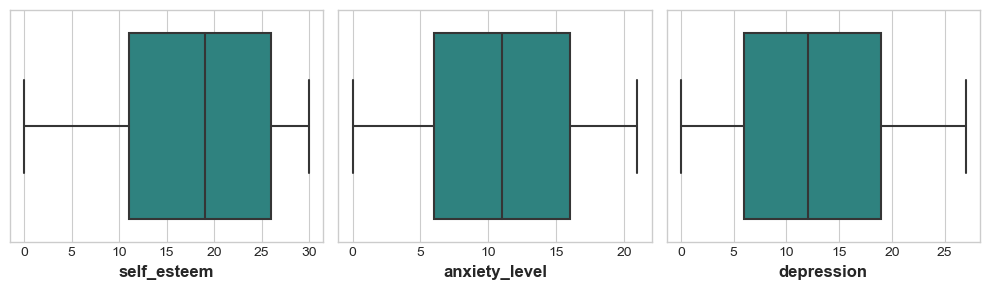

In [10]:
def plot_box(df, cols):
    fig, axes = plt.subplots(1, 3, figsize=(10, 3), dpi=100)
    axes = axes.flatten()

    for i, col in enumerate(cols):
        sns.set_style("whitegrid")
        sns.boxplot(col, data = df ,ax = axes[i],palette ='viridis_r')
        axes[i].set_xlabel(col)
    plt.show() 
plot_box(df, num_cols )

<h3 align=center><font size = 5>Distribution of the Target Variable </font></h3>

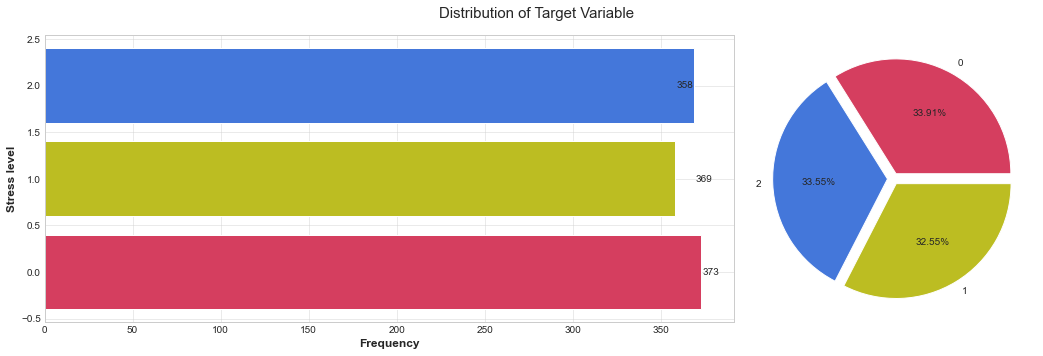

In [11]:
y = df['stress_level'].value_counts()
colors = ["#d53e5f","#4477DA","#bcbd22"  ]
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[2,1]})


axes[0].barh(y=y.index, width=y.values, color=colors)
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Stress level')
axes[0].grid(alpha=0.5)
for index, values in enumerate(y):
    axes[0].text(values+1, index, str(values), va='center')

axes[1].pie(y.values, labels=y.index, autopct='%.2f%%', explode=([0.05]*len(y.index)), colors=colors)

    

figure.suptitle('Distribution of Target Variable', fontsize=15)
plt.tight_layout(pad=1)
plt.show()


<h3 align=center><font size = 5>Distribution of the Categorical Variables </font></h3>

In [12]:
def plot_bar(df, cols):
    fig, axes = plt.subplots(6, 3, figsize=(15, 30), dpi=100)
    axes = axes.flatten()

    for i, col in enumerate(cols):
        counts = df[col].value_counts()
        counts.plot.bar(ax = axes[i],color= "#4477DA")
        axes[i].set_title("Distibution of " + col)
        axes[i].set_xlabel(col)
    plt.tight_layout()
    plt.show()

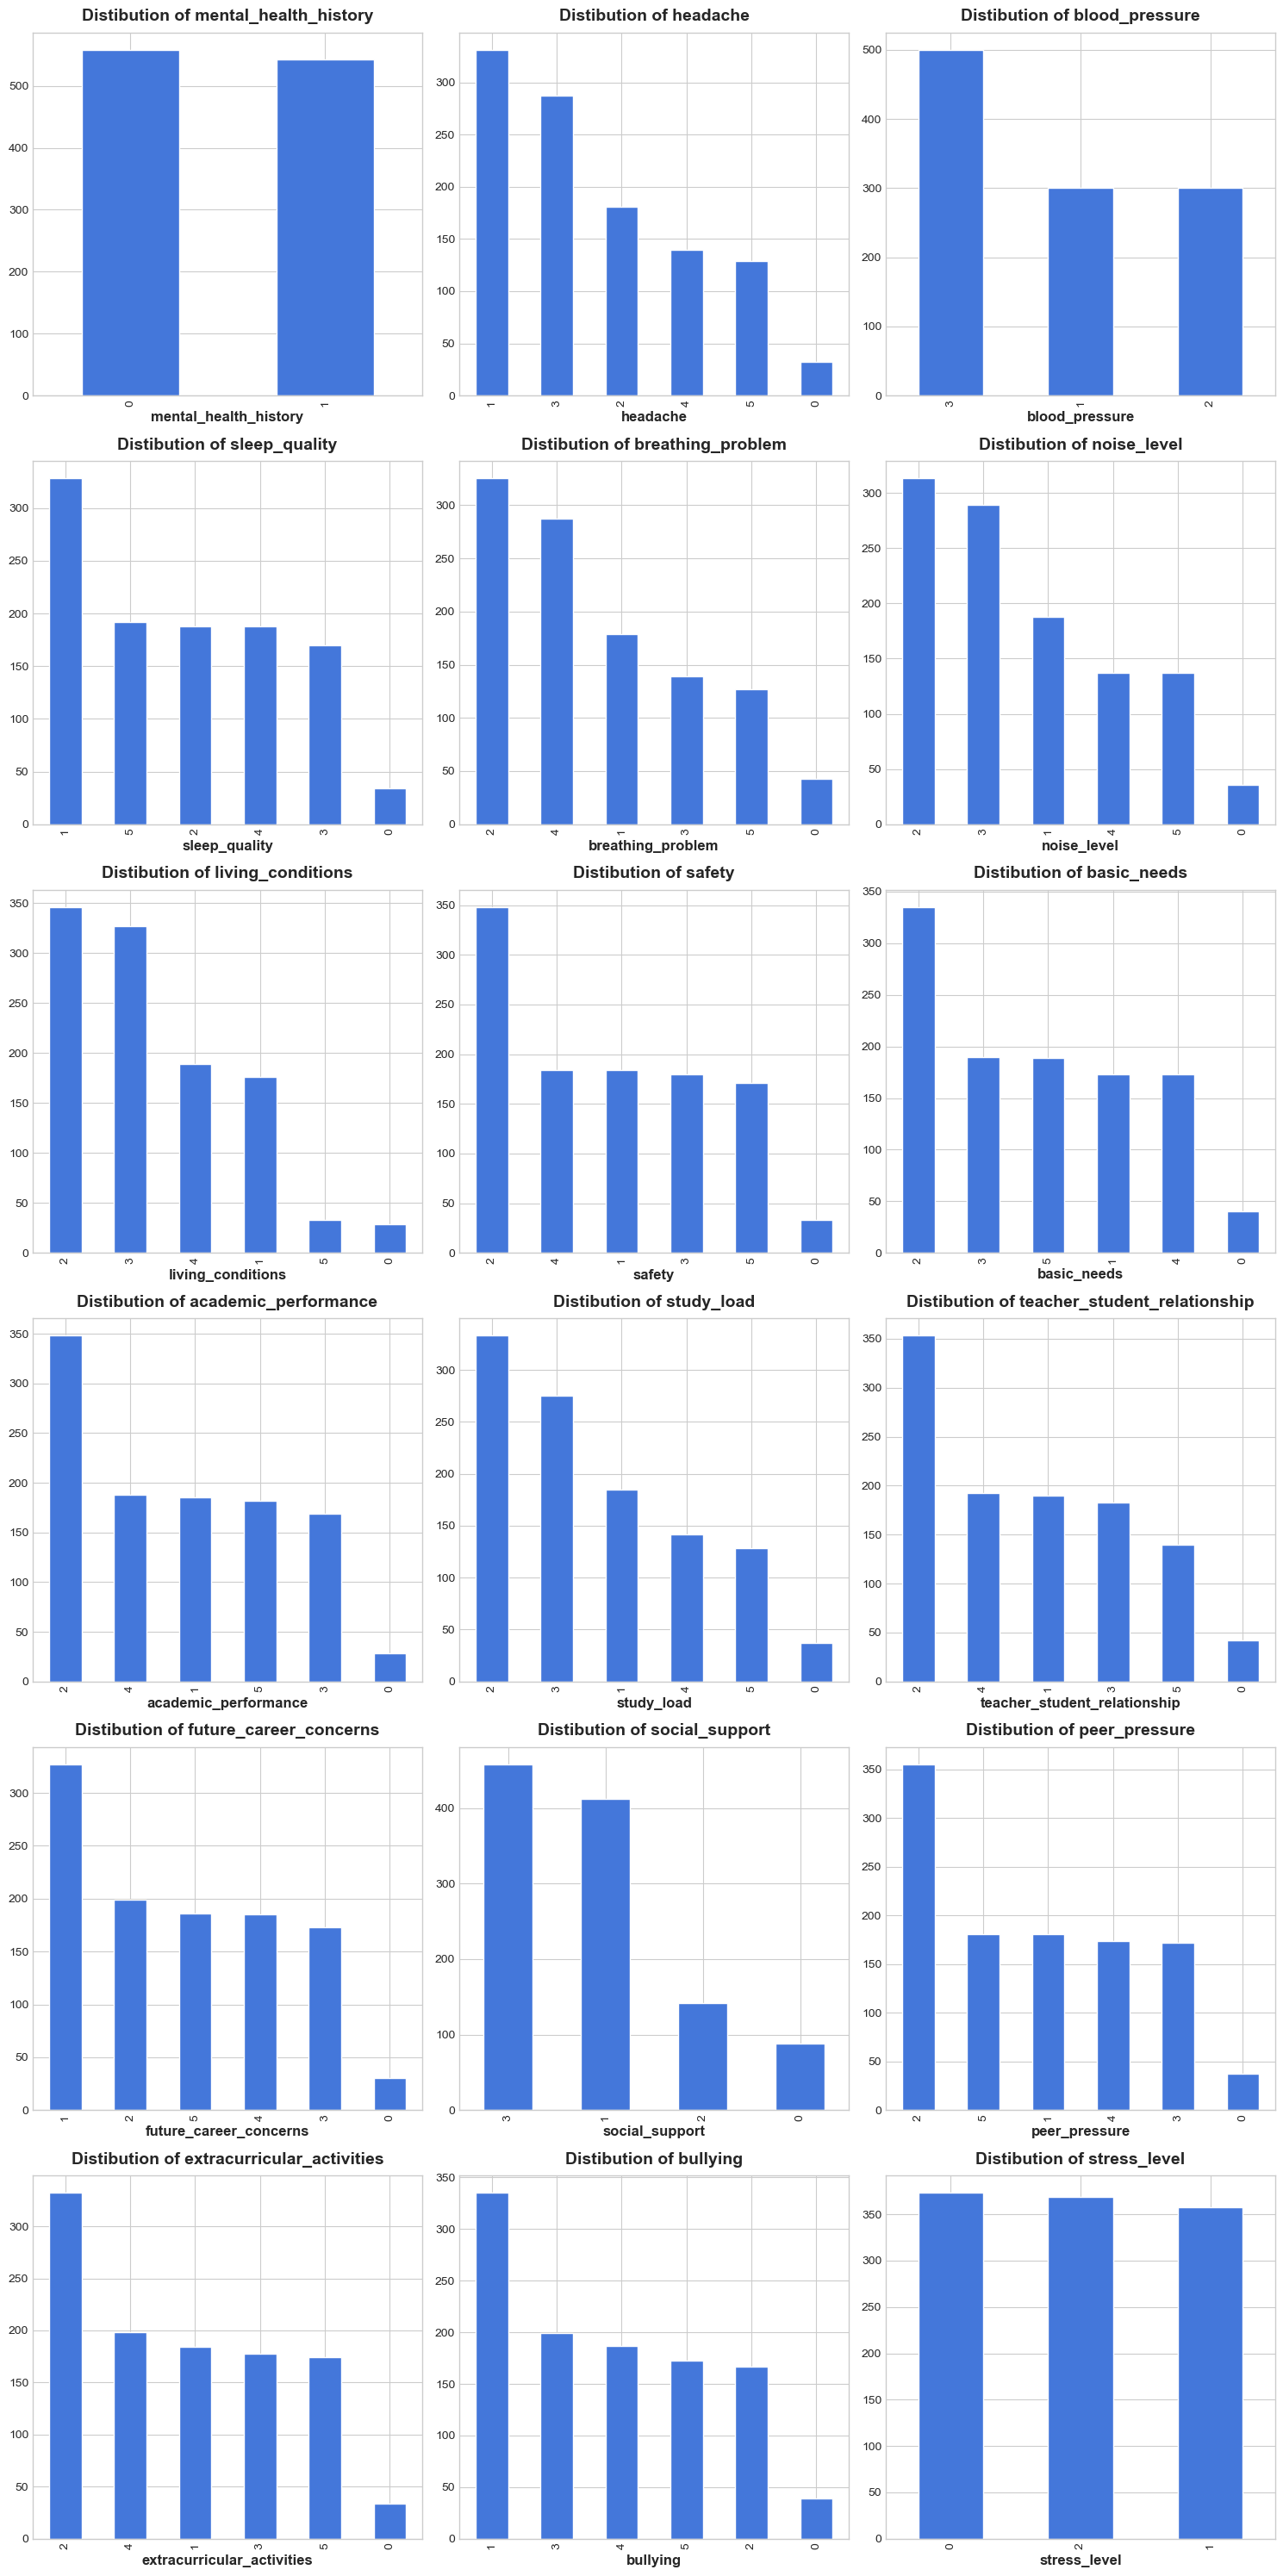

In [13]:
plot_bar(df, categorical_variables)

<h3 align=center><font size = 5>Distribution of the Numeric Variables </font></h3>

In [14]:
num = df[numeric_variables]

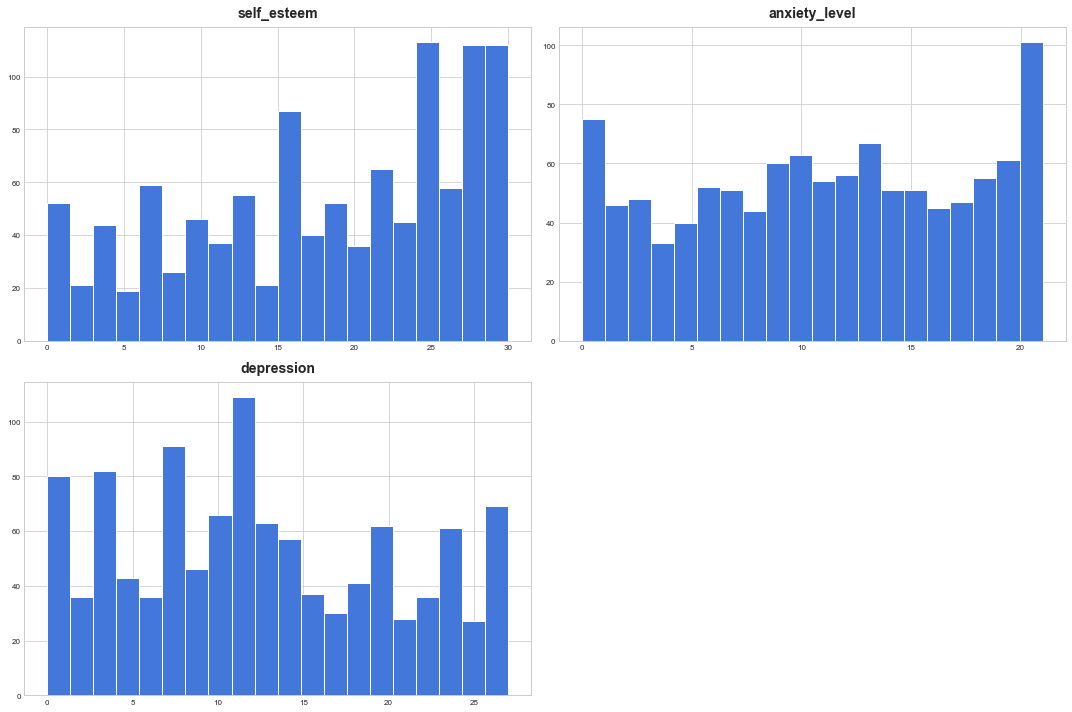

In [15]:
num.hist(figsize=(15, 10), bins=20, xlabelsize=8, ylabelsize=8,color = "#4477DA");

<h3> Visualizing the relationship between categoric variables and the target variable</h3>

In [16]:
cols = ['mental_health_history',
 'headache',
 'blood_pressure',
 'sleep_quality',
 'breathing_problem',
 'noise_level',
 'living_conditions',
 'safety',
 'basic_needs',
 'academic_performance',
 'study_load',
 'teacher_student_relationship',
 'future_career_concerns',
 'social_support',
 'peer_pressure',
 'extracurricular_activities',
 'bullying']

In [17]:
def create_plot_pivot(data2, x_column):
    _df_plot = data2.groupby([x_column, 'stress_level']).size() \
    .reset_index().pivot(columns='stress_level', index=x_column, values=0)
    return _df_plot

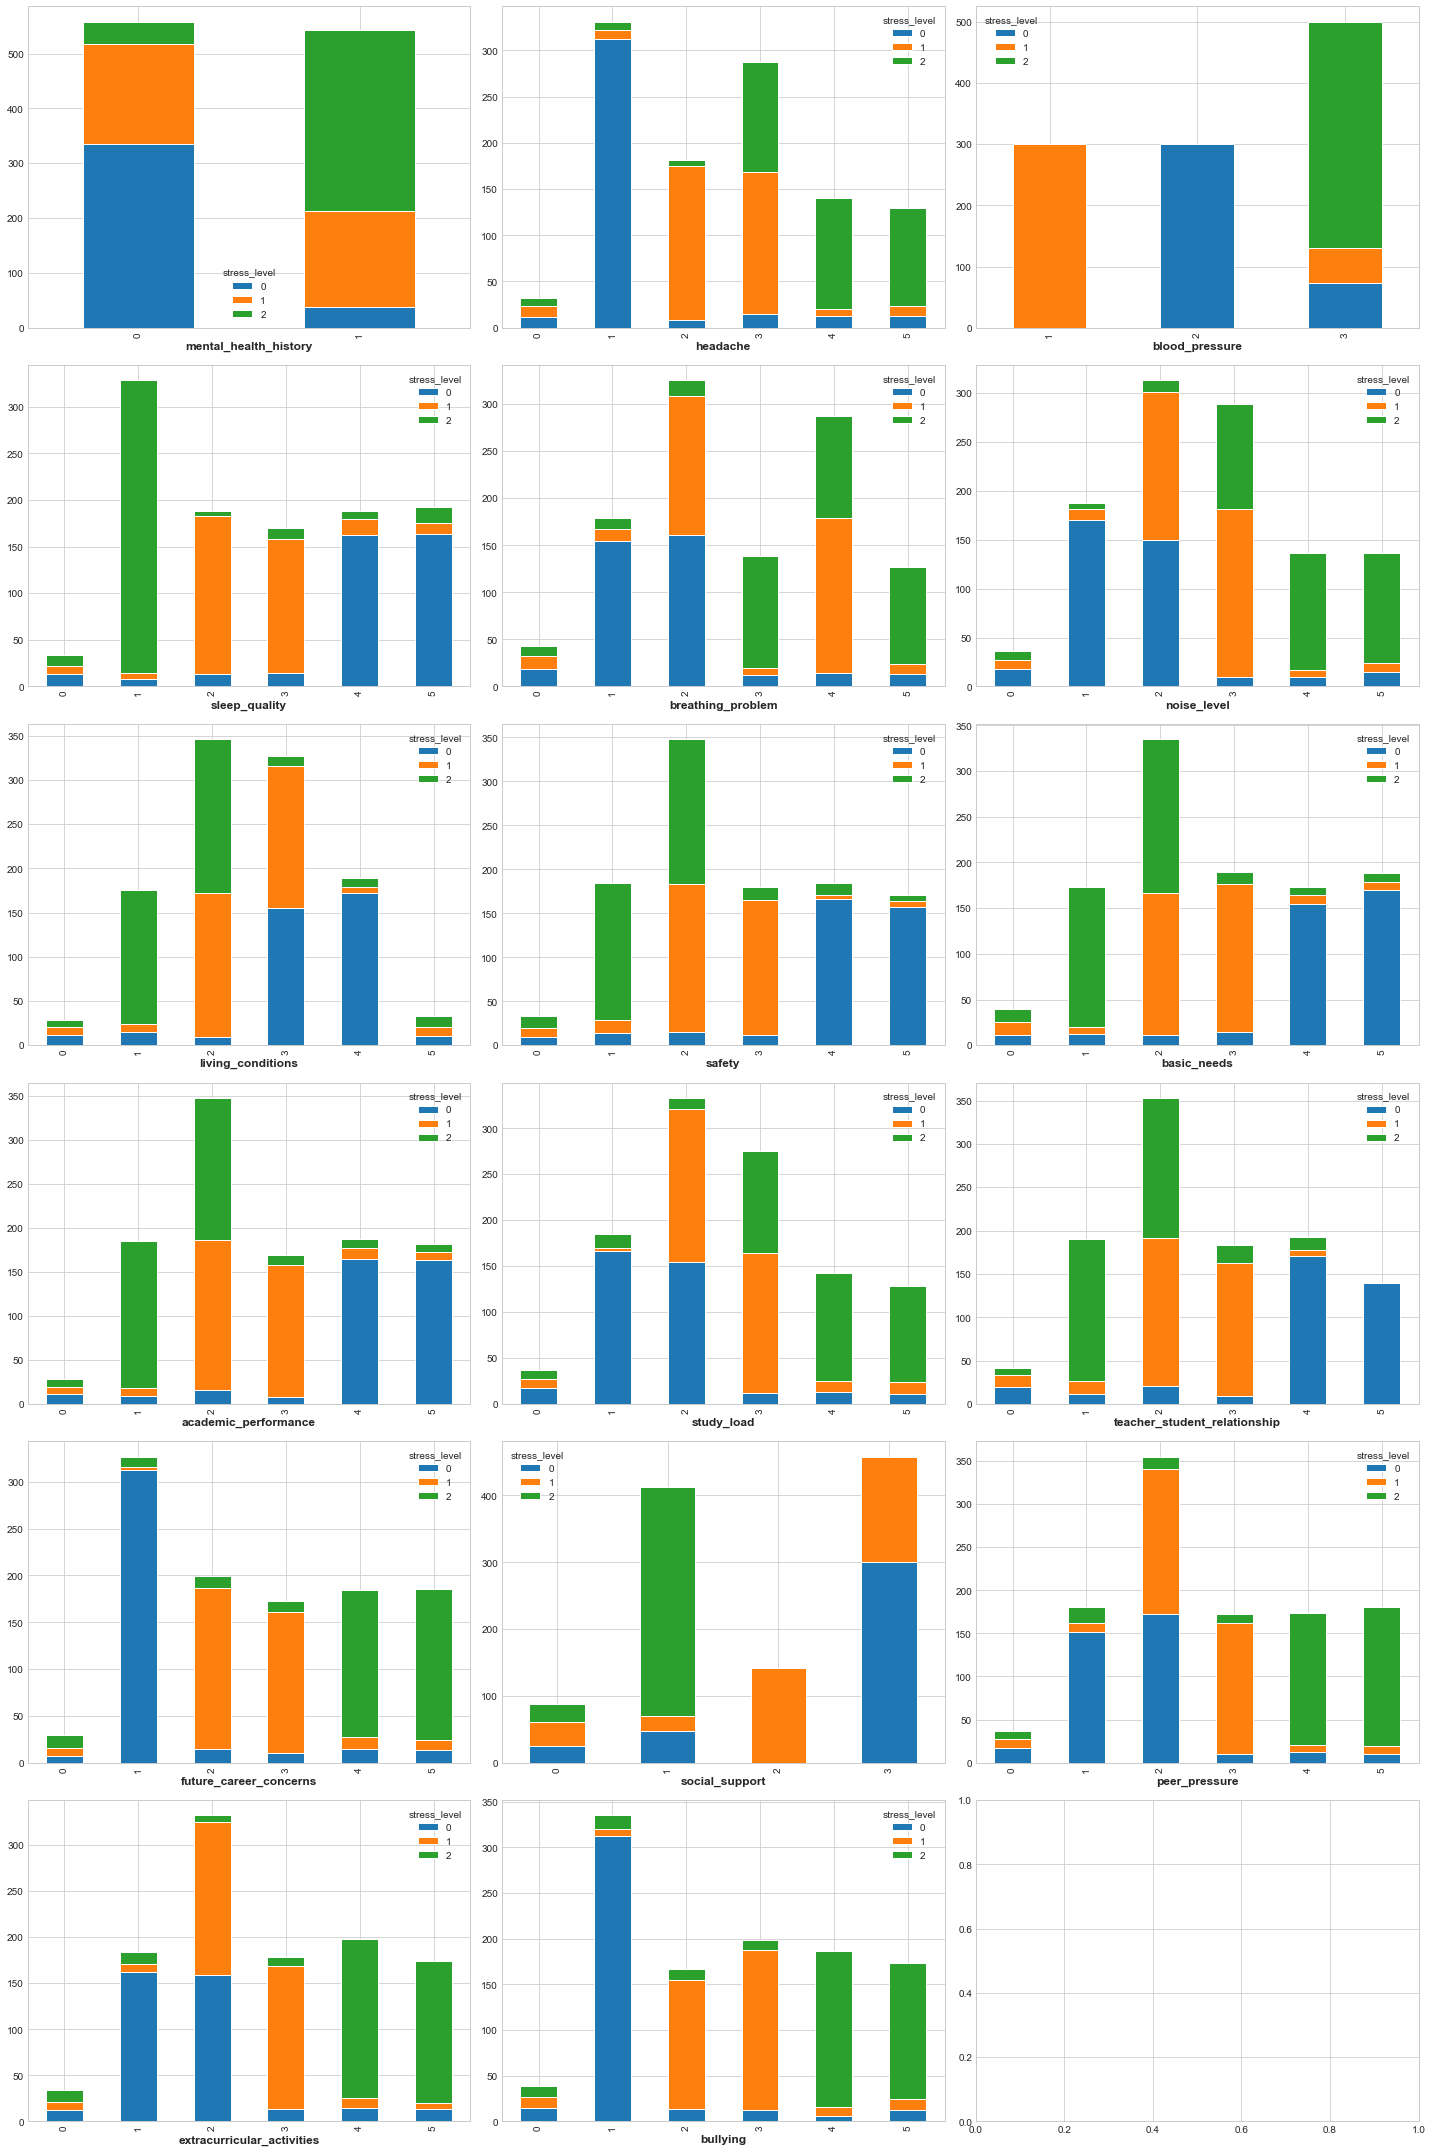

In [18]:
fig, ax = plt.subplots(6, 3, figsize=(20,30))
axe = ax.ravel()

c = len(cols)

for i in range(c):
    create_plot_pivot(df, cols[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])
    
fig.show()

# Correlation

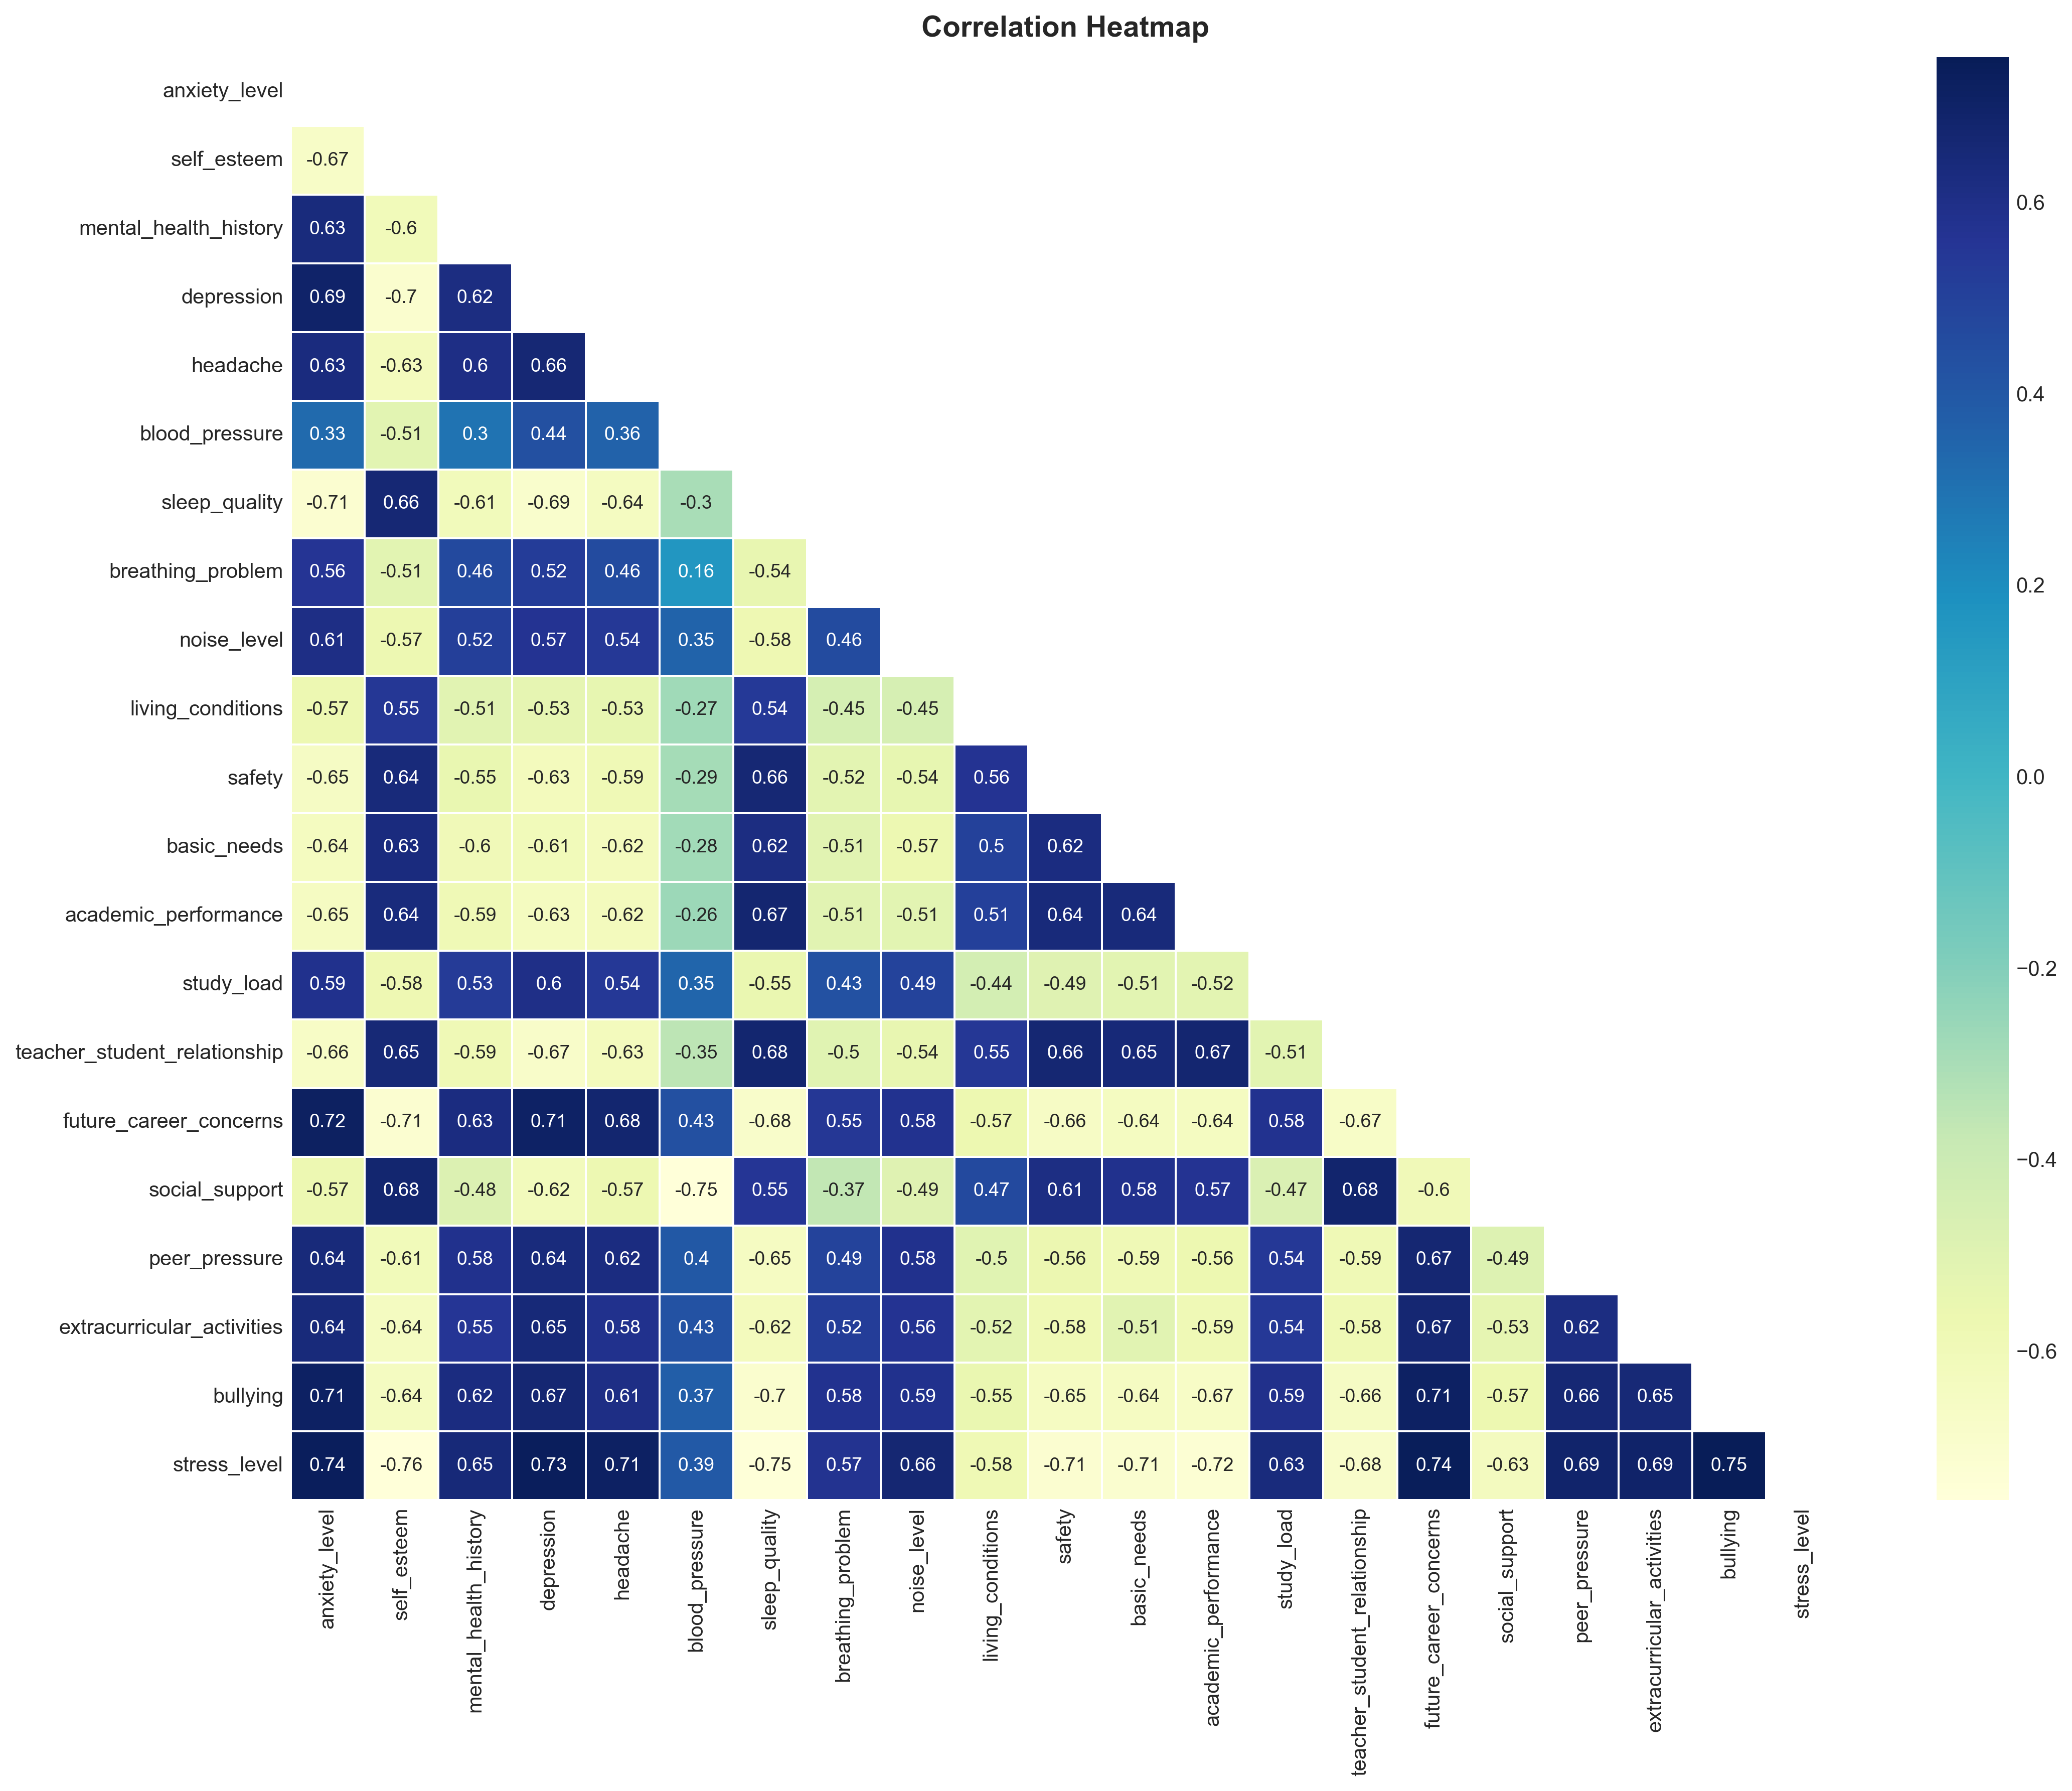

In [19]:
# Plot correlation heatmap
plt.figure(figsize=(15, 12), dpi=300)
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='YlGnBu', linewidth=.5, annot_kws={'size': 9})
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [21]:
y = df['stress_level']
x = df.drop(['stress_level'], axis = 1)

In [22]:
correlation = x.corrwith(y)
correlation

anxiety_level                   0.736795
self_esteem                    -0.756195
mental_health_history           0.648644
depression                      0.734379
headache                        0.713484
blood_pressure                  0.394200
sleep_quality                  -0.749068
breathing_problem               0.573984
noise_level                     0.663371
living_conditions              -0.581723
safety                         -0.709602
basic_needs                    -0.708968
academic_performance           -0.720922
study_load                      0.634156
teacher_student_relationship   -0.680163
future_career_concerns          0.742619
social_support                 -0.632497
peer_pressure                   0.690684
extracurricular_activities      0.692977
bullying                        0.751162
dtype: float64

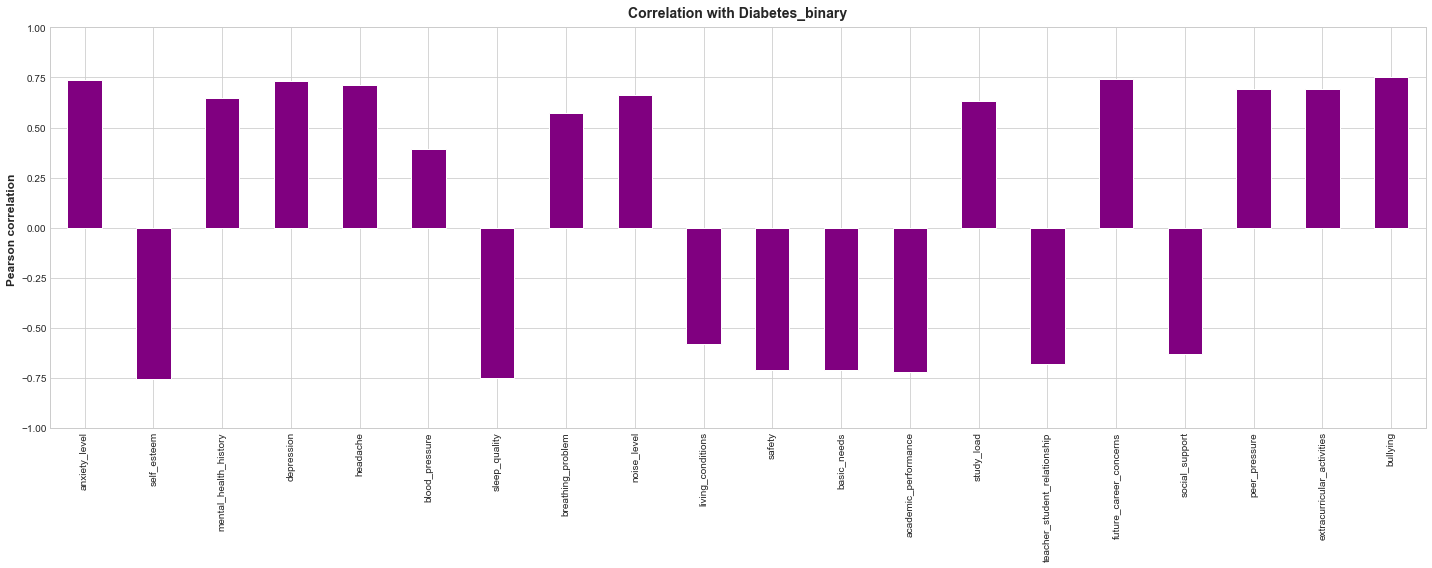

In [23]:
ax = correlation.plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Diabetes_binary",color="Purple")
ax.set(ylim = [-1, 1],ylabel = "Pearson correlation ");

# <h3 align=center><font size = 6>Data preprocessing </font></h3>

<h3 align=center><font size = 5>Features Importance Analysis </font></h3>

In [24]:
discrete_features = x.dtypes == int

In [25]:
from sklearn.feature_selection import mutual_info_classif
def make_mi_scores(x,y,discrete_features):
    mi_scores = mutual_info_classif(x,y,discrete_features =discrete_features )
    mi_scores = pd.Series(mi_scores, name = "MI Scores", index = x.columns)
    mi_scores = mi_scores.sort_values(ascending = False)
    return mi_scores
mi_scores =  make_mi_scores(x,y,discrete_features) 
mi_scores

blood_pressure                  0.761885
future_career_concerns          0.680827
sleep_quality                   0.676224
bullying                        0.664814
depression                      0.661749
anxiety_level                   0.648140
self_esteem                     0.647734
headache                        0.564950
academic_performance            0.540963
social_support                  0.529240
extracurricular_activities      0.526583
teacher_student_relationship    0.522799
basic_needs                     0.514300
safety                          0.506942
peer_pressure                   0.499054
noise_level                     0.430108
study_load                      0.391124
breathing_problem               0.372756
living_conditions               0.364866
mental_health_history           0.225441
Name: MI Scores, dtype: float64

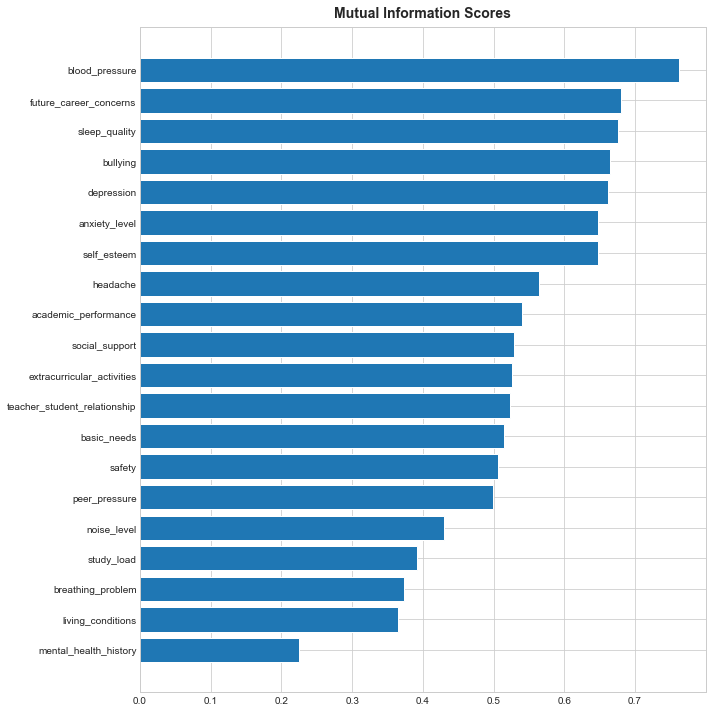

In [26]:
def plot_mi_scores(scores):
    fig, ax = plt.subplots(figsize=(10,10))
    scores = scores.sort_values(ascending = True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
    
plot_mi_scores(mi_scores)

## Train-test split

In [27]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1,shuffle =True)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 330
number of training samples: 770


### Features scaling

In [28]:
# X_train Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(df_scaled, columns = x_train.columns)

# X_valid Scaling
df_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(df_scaled, columns = x_test.columns)
x_test.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
anxiety_level,330.0,-0.059,0.995,-1.824,-0.844,-0.028,0.788,1.605
self_esteem,330.0,-0.014,1.025,-2.007,-0.880,0.190,0.922,1.373
mental_health_history,330.0,-0.040,1.001,-0.997,-0.997,-0.997,1.003,1.003
depression,330.0,0.055,1.037,-1.627,-0.809,-0.056,0.991,1.908
headache,330.0,-0.074,1.036,-1.822,-1.104,-0.387,1.048,1.766
blood_pressure,330.0,-0.005,1.000,-1.419,-1.419,-0.220,0.980,0.980
sleep_quality,330.0,0.067,0.986,-1.691,-1.048,0.239,0.882,1.526
breathing_problem,330.0,0.014,1.071,-2.005,-0.546,0.184,0.913,1.643
noise_level,330.0,0.035,1.007,-1.988,-0.479,0.275,1.030,1.784
living_conditions,330.0,-0.024,1.046,-2.289,-0.477,-0.477,0.429,2.242


# Modelling

### Helper Functions

In [29]:
from sklearn import metrics

In [30]:
def clf_plot(y_pred) :
    '''
    1) Ploting Confusion Matrix
    2) Plotting Classification Report'''
    cm = metrics.confusion_matrix(y_test, y_pred)
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Left: Confusion Matrix
    ax[0] = sns.heatmap(cm, annot=True, fmt='', cmap='YlGnBu', ax=ax[0])
    ax[0].set_xlabel('Predicted labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=20)
    ax[0].xaxis.set_ticklabels([0,1,2])
    ax[0].yaxis.set_ticklabels([0,1,2])

    # Right: Classification Report
    ax[1] = sns.heatmap(cr, cmap='YlGnBu', annot=True, linecolor='white', linewidths=0.5, ax=ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=20)
    plt.show()

## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'class_weight' : ['balanced'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

lr = LogisticRegression()

In [32]:
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=4).fit(x_train, y_train)

In [33]:
print('Tuned hyperparameters : ', lr_cv.best_params_)
print('accuracy : ', lr_cv.best_score_)

Tuned hyperparameters :  {'C': 10, 'class_weight': 'balanced', 'solver': 'sag'}
accuracy :  0.8843911917098446


In [34]:
best_model = lr_cv.best_estimator_

In [35]:
yhat_train = best_model.predict(x_train)
yhat_test1 = best_model.predict(x_test)


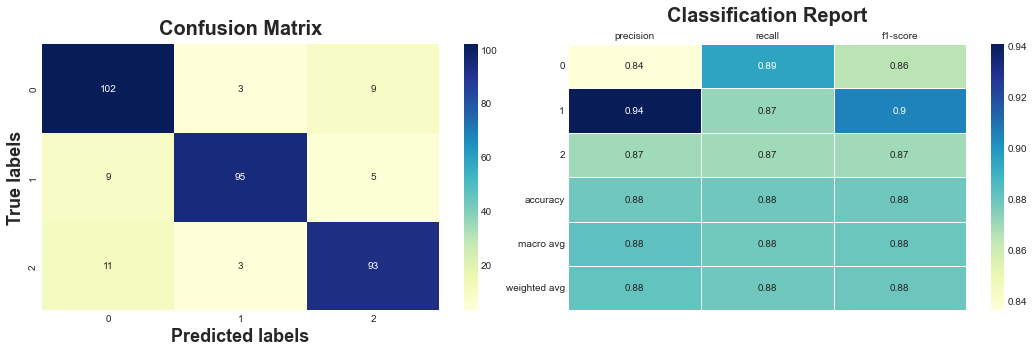

In [36]:
clf_plot(yhat_test1)

# Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# create a Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=122)

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4]
}

# create the GridSearchCV object
grid_search_tree = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_tree.fit(x_train, y_train)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_tree.best_params_)
print('Best Accuracy: ', grid_search_tree.best_score_)

# get the best model
best_tree = grid_search_tree.best_estimator_

Best Parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
Best Accuracy:  0.8961038961038961


In [38]:
yhat_train = best_tree.predict(x_train)
yhat_test2 = best_tree.predict(x_test)


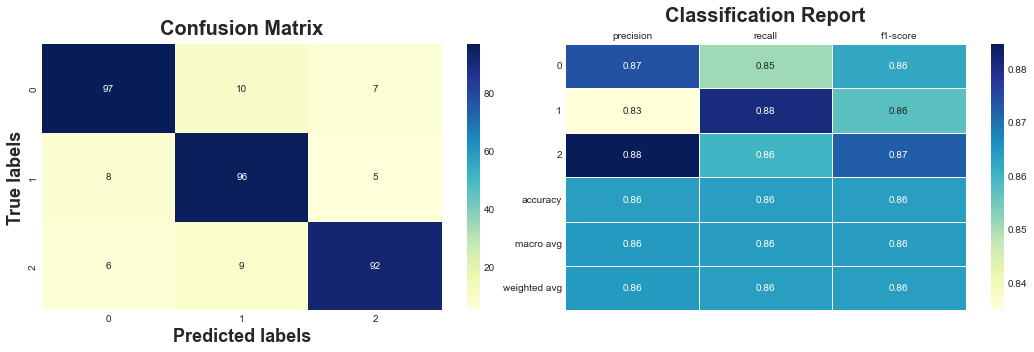

In [39]:
clf_plot(yhat_test2)

# KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

# create the KNN classifier
knn = KNeighborsClassifier()

# define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': np.arange(1, 21),  
    'p': [1, 2]  # 1 for Manhattan distance (L1), 2 for Euclidean distance (L2)
}

# create a GridSearchCV object with KNN and the parameter grid
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the model with the training data
grid_search_knn.fit(x_train, y_train)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_knn.best_params_)
print('Best Accuracy: ', grid_search_knn.best_score_)

# get the best model
best_knn_base = grid_search_knn.best_estimator_

Best Parameters:  {'n_neighbors': 1, 'p': 2}
Best Accuracy:  0.9012987012987013


In [41]:
yhat_train = best_knn_base.predict(x_train)
yhat_test3 = best_knn_base.predict(x_test)


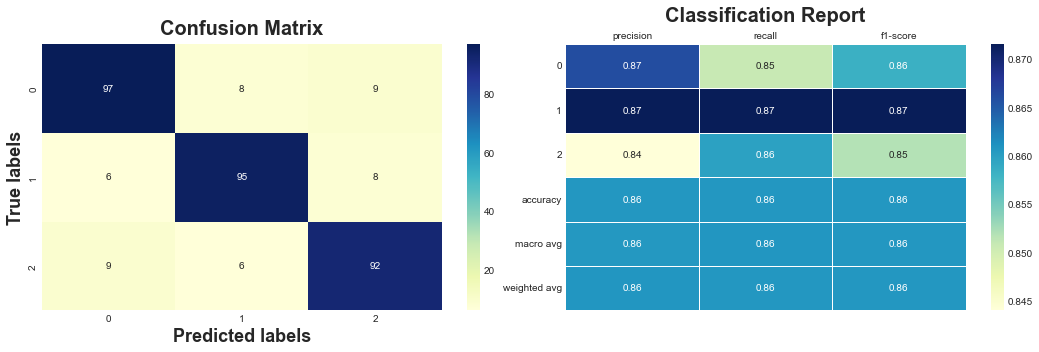

In [42]:
clf_plot(yhat_test3)

# Random forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

# create a Random Forest Classifier
forest = RandomForestClassifier(random_state=122)

# define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}

# create the GridSearchCV object
grid_search_forest = GridSearchCV(forest, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_forest.fit(x_train, y_train)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_forest.best_params_)
print('Best Accuracy: ', grid_search_forest.best_score_)

# get the best model
best_forest_selected = grid_search_forest.best_estimator_

Best Parameters:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best Accuracy:  0.8870129870129869


In [44]:
yhat_train = best_forest_selected.predict(x_train)
yhat_test4 = best_forest_selected.predict(x_test)


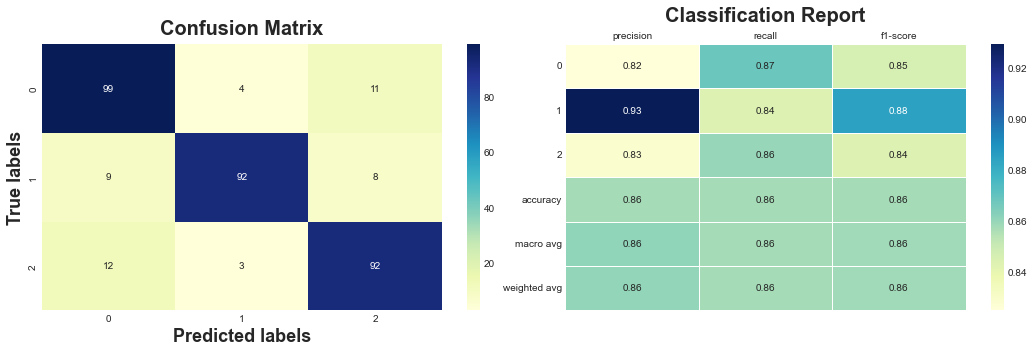

In [45]:
clf_plot(yhat_test4)

# SVC

In [46]:
from sklearn.svm import SVC
# Dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'gamma' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
}

svc = SVC()
svc_cv = GridSearchCV(estimator=svc, param_grid=parameters, cv=10).fit(x_train, y_train)

print('Tuned hyper parameters : ', svc_cv.best_params_)
print('accuracy : ', svc_cv.best_score_)

Tuned hyper parameters :  {'C': 1000, 'gamma': 0.001}
accuracy :  0.8935064935064936


In [47]:
best_svc = svc_cv.best_estimator_

In [48]:
yhat_train = best_svc.predict(x_train)
yhat_test = best_svc.predict(x_test)

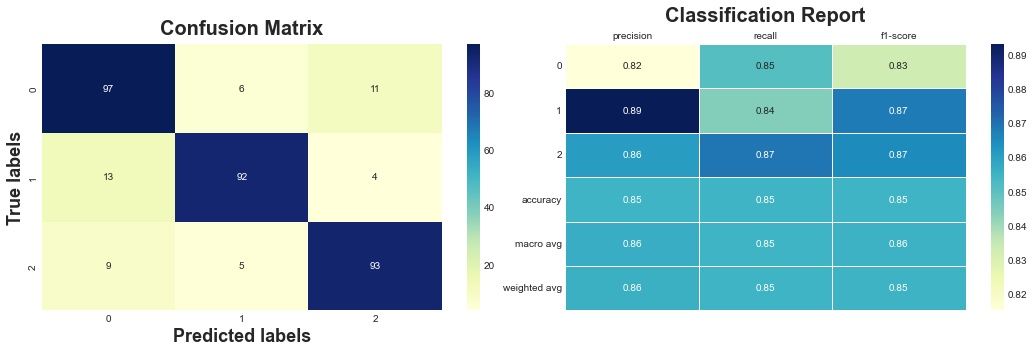

In [49]:
clf_plot(yhat_test)

In [50]:
result = pd.DataFrame({
    'Algorithm' : ["Logistic Regression","Decision Tree",'KNN',"Random forest", "SVC"],
    'Score' : [0.8843,0.8961,0.9, 0.8857,0.8935]
})

result.sort_values(by='Score', inplace=True)

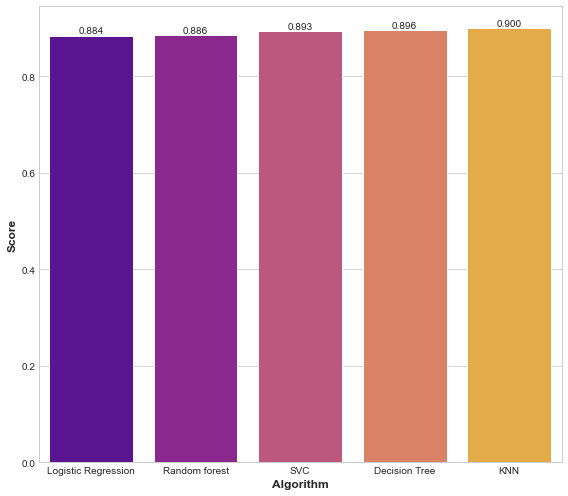

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(8, 7))

sns.barplot(x='Algorithm', y='Score', data=result, palette = "plasma")
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result.Algorithm)
plt.show()

### Based on the above output, best algorithm base on F1 Score is : KNeighbors Classifier

---
# END
Thank you :)